# Análisis exploratorio de los datos
## Trabajo MDS-2oTrim. ==> Inmigracion en Chile

**Profesora:** Donoso I.<br>
**Alumnos:** Briceno, H.; Rovai, M.; Tessada G.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

## 1. Importar el dataset

Vamos a usar datos de la base de datos del [Departamento de Extranjeria y Migracion de Chile](http://www.extranjeria.gob.cl/estadisticas-migratorias/). 

El Departamanto de Extranjeria y Migracion de Chile, aclara que si bien las bases se presentan de manera separada por tratarse de distintos tipos de permiso, ellas no constituyen universos distintos de inmigrantes. Un inmigrante en Chile para obtener una permanencia definitiva DEBE haber obtenido con anterioridad una visa, por lo que las bases de permanencias definitivas se conforman de personas que están contabilizadas en las visas. <br>
<br>Así, para una mejor lectura de los datos haremos una distinción en términos de migración transitoria y migración permanente. Se considerará que las visas corresponden a migración transitoria, pues los permisos duran entre uno y dos años. Las personas que sean titulares de una visa, para quedarse por un plazo mayor a dos años, deben solicitar un permiso de permanencia definitiva, de otra manera deben abandonar el país.<br>
- En este trabajo focaremos en la MIGRACIÓN DEFINITIVA, que están relacionadas a las Permisos de Residencia Definitiva
- Y se complementará esa información con la migración reciente, es decir, las visas otorgadas los dos últimos años (2017/2018).
<br>
<br>
---
#### Los numeros finales no són una fotografia de los inmigrantes en Chile, pero se podrá analisar tendencias

In [2]:
ls

Inmigracion-EDA.ipynb
Inmigrantes - Glosario-Estadísticas-Final-Inst.pdf
RM_PoblacionMigranteChile.pdf
data/


In [3]:
ls ./data

PDs-2005-2016.xlsx              Visas-2011-2016.xlsx
PDs-2017.xlsx                   Visas-2017.xlsx
PDs_2018_1.xlsx                 Visas-2018_1.xlsx
Visas-2005-2010.xlsx            inmigrantes_metropolitana.xlsx


In [4]:
df1 = pd.read_excel('./data/PDs-2005-2016.xlsx')
df1.shape

(324932, 12)

In [5]:
df1.head(2)

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO
0,Femenino,1974-10-05,EMPLEADO,MATRONA,PERÚ,no indica,SANTIAGO,SANTIAGO,METROPOLITANA,T,2006,PERMANENCIA DEFINITIVA
1,Masculino,1949-09-13,EMPLEADO,INGENIERO,ECUADOR,no indica,PROVIDENCIA,SANTIAGO,METROPOLITANA,T,2007,PERMANENCIA DEFINITIVA


In [6]:
df2 = pd.read_excel('./data/PDs-2017.xlsx')
df2.shape

(87757, 12)

In [7]:
df2.head(2)

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO
0,femenino,1992-06-23,EMPLEADO,LICENCIADO,ECUADOR,UNIVERSITARIO,HUECHURABA,SANTIAGO,METROPOLITANA,T,2017,PERMANENCIA DEFINITIVA
1,masculino,1965-01-01,EMPRESARIO O PATRON,EMPRESARIO O PATRON,CHINA REPUBLICA POPULAR,UNIVERSITARIO,SAN FERNANDO,COLCHAGUA,O'HIGGINS,T,2017,PERMANENCIA DEFINITIVA


In [8]:
df3 = pd.read_excel('./data/PDs_2018_1.xlsx')
df3.shape

(48208, 12)

In [9]:
df3.head(2)

,SEXO,FECH-NAC,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO
0,masculino,1985-08-01,EMPLEADO,MENSAJERO,PERÚ,NO INFORMA,RECOLETA,SANTIAGO,REGION METROPOLITANA DE SANTIAGO,T,2018,OTORGA PERMANENCIA DEFINITIVA
1,masculino,2001-11-01,ESTUDIANTE,ESTUDIANTE,COLOMBIA,BASICO,INDEPENDENCIA,SANTIAGO,REGION METROPOLITANA DE SANTIAGO,D,2018,OTORGA PERMANENCIA DEFINITIVA


In [10]:
df4 = pd.read_excel('./data/Visas-2017.xlsx')
df4.shape

(267596, 12)

In [11]:
df4.head(2)

,SEXO,FECH-NAC,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO RESUMIDO
0,masculino,1962-01-24,OTRAS ACTIVIDADES,GEOFISICO,ESTADOS UNIDOS,UNIVERSITARIO,SANTIAGO,SANTIAGO,METROPOLITANA,T,2017,TEMPORARIA
1,masculino,1973-01-04,EMPLEADO,INGENIERO,BOLIVIA,NO INFORMA,LAS CONDES,SANTIAGO,METROPOLITANA,T,2017,TEMPORARIA


In [12]:
df5 = pd.read_excel('./data/Visas-2018_1.xlsx', sheet_name=1)
df5.shape

(188638, 12)

In [13]:
df5.head(2)

,SEXO,FECH-NAC,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO RESUMIDO
0,masculino,1993-02-10,INACTIVO,EMPLEADO,ARGENTINA,UNIVERSITARIO,PUCON,CAUTÍN,REGION DE LA ARAUCANIA,T,2018,TEMPORARIA
1,femenino,1976-01-20,DUEÑA DE CASA,DUEÑA DE CASA,ARGENTINA,no indica,VALDIVIA,VALDIVIA,REGION DE LOS RIOS,T,2018,TEMPORARIA


Se observa que todos los datasets tienen las mismas columnas, excepto por nombres de la columnas "FECH-NAC" y 'BENEFICIO RESUMIDO', las cuales tienen que ser cambiadas. 

In [14]:
df3.rename(columns = {'FECH-NAC': 'NACIMIENTO'}, inplace=True)
df4.rename(columns = {'FECH-NAC': 'NACIMIENTO'}, inplace=True)
df5.rename(columns = {'FECH-NAC': 'NACIMIENTO'}, inplace=True)
df4.rename(columns = {'BENEFICIO RESUMIDO': 'BENEFICIO'}, inplace=True)
df5.rename(columns = {'BENEFICIO RESUMIDO': 'BENEFICIO'}, inplace=True)

Concatenar los datasets en un unico dataset

In [15]:
df = pd.concat([df1, df2])
df.shape

(412689, 12)

In [16]:
df = pd.concat([df, df3])
df.shape

(460897, 12)

In [17]:
df = pd.concat([df, df4])
df.shape

(728493, 12)

In [18]:
df = pd.concat([df, df5])
df.shape

(917131, 12)

## 2. Limpiar el dataset

In [19]:
df.head() 

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO
0,Femenino,1974-10-05,EMPLEADO,MATRONA,PERÚ,no indica,SANTIAGO,SANTIAGO,METROPOLITANA,T,2006,PERMANENCIA DEFINITIVA
1,Masculino,1949-09-13,EMPLEADO,INGENIERO,ECUADOR,no indica,PROVIDENCIA,SANTIAGO,METROPOLITANA,T,2007,PERMANENCIA DEFINITIVA
2,Femenino,1949-12-07,EMPLEADO,ASESORA DEL HOGAR,BOLIVIA,BASICO,ARICA,ARICA,ARICA Y PARINACOTA,T,2007,PERMANENCIA DEFINITIVA
3,Femenino,1966-09-20,DUEÑA DE CASA,DUEÑA DE CASA,BOLIVIA,MEDIO,ARICA,ARICA,ARICA Y PARINACOTA,T,2006,PERMANENCIA DEFINITIVA
4,Masculino,1981-08-15,EMPRESARIO O PATRON,COMERCIANTE,BRASIL,no indica,LAS CONDES,SANTIAGO,METROPOLITANA,T,2008,PERMANENCIA DEFINITIVA


In [20]:
df.tail()

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO
188633,masculino,1952-01-20,EMPRESARIO O PATRON,EMPRESARIO O PATRON,ARGENTINA,MEDIO,SAN ESTEBAN,LOS ANDES,REGION DE VALPARAISO,T,2018,TEMPORARIA
188634,masculino,1974-10-10,EMPLEADO,CHOFER,ARGENTINA,BASICO,LOS ANDES,LOS ANDES,REGION DE VALPARAISO,T,2018,TEMPORARIA
188635,masculino,1985-05-03,EMPLEADO,EMPLEADO,BRASIL,MEDIO,LOS ANDES,LOS ANDES,REGION DE VALPARAISO,T,2018,TEMPORARIA
188636,masculino,2006-05-01,ESTUDIANTE,ESTUDIANTE,ARGENTINA,BASICO,CALLE LARGA,LOS ANDES,REGION DE VALPARAISO,D,2018,TEMPORARIA
188637,masculino,2009-06-17,ESTUDIANTE,ESTUDIANTE,ARGENTINA,BASICO,CALLE LARGA,LOS ANDES,REGION DE VALPARAISO,D,2018,TEMPORARIA


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917131 entries, 0 to 188637
Data columns (total 12 columns):
SEXO          917131 non-null object
NACIMIENTO    917130 non-null datetime64[ns]
ACTIVIDAD     917131 non-null object
PROFESION     917131 non-null object
PAIS          917131 non-null object
ESTUDIOS      917131 non-null object
COMUNA        917131 non-null object
PROVINCIA     917131 non-null object
REGION        917131 non-null object
TIT_DEP       915476 non-null object
AÑO           917131 non-null int64
BENEFICIO     917131 non-null object
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 91.0+ MB


El dataset tiene 917.131 observaciones y 12 caracterísiticas. 
- TIT_DEP tiene menos datos que los demas

In [22]:
df.TIT_DEP.value_counts()

T    809661
D    105815
Name: TIT_DEP, dtype: int64

In [23]:
df.TIT_DEP.describe()

count     915476
unique         2
top            T
freq      809661
Name: TIT_DEP, dtype: object

In [24]:
df.TIT_DEP.isnull().sum()

1655

Hay 1655 lineas que no especifican si es titular o dependente. Por ahora, consideremos una clase 'x'

In [25]:
df[df.TIT_DEP.isnull()].sample(5)

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO
49517,Femenino,1971-12-29,DUEÑA DE CASA,ENFERMERO,BOLIVIA,no indica,LA SERENA,ELQUI,COQUIMBO,NaN,2006,PERMANENCIA DEFINITIVA
32759,Masculino,1966-05-15,TRABAJADOR POR CUENTA PROPIA,LICENCIADO,CUBA,no indica,PUNTA ARENAS,MAGALLANES,MAGALLANES,NaN,2005,PERMANENCIA DEFINITIVA
15917,femenino,2015-08-13,INACTIVO,MENOR DE EDAD,BOLIVIA,NINGUNO,IQUIQUE,IQUIQUE,REGION DE TARAPACA,NaN,2018,TEMPORARIA
43180,Masculino,1943-07-05,NO INFORMA,COMERCIANTE,ARGENTINA,no indica,VALPARAISO,VALPARAISO,VALPARAISO,NaN,2005,PERMANENCIA DEFINITIVA
156824,femenino,2002-06-22,ESTUDIANTE,MENOR DE EDAD,COLOMBIA,MEDIO,COQUIMBO,ELQUI,REGION DE COQUIMBO,NaN,2018,TEMPORARIA


In [26]:
df.TIT_DEP.fillna('x', inplace=True)

In [27]:
len(df.TIT_DEP)

917131

In [28]:
df.NACIMIENTO.isnull().sum()

1

In [29]:
df[df.NACIMIENTO.isnull()]

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO
155441,Femenino,NaT,EMPLEADO,EMPLEADO,COLOMBIA,NO INFORMA,MACUL,SANTIAGO,METROPOLITANA,T,2010,PERMANENCIA DEFINITIVA


Hay 1 Titular del sexo feminino que no posue fecha de nacimiento

In [30]:
df[df.TIT_DEP == 'T'].NACIMIENTO.min()

Timestamp('1900-01-02 00:00:00')

In [31]:
df.NACIMIENTO.fillna('1985-01-01', inplace=True)

In [32]:
df['NACIMIENTO'] = pd.to_datetime(df['NACIMIENTO'])

In [33]:
df.SEXO.value_counts()

masculino    324068
femenino     268131
Femenino     173110
Masculino    151822
Name: SEXO, dtype: int64

Se observa que hay informaciones en mayusculas y minusculas. Cambiemos todas las columnas del dataset con strings a minusculas y aprovechamos y veriquemos que no hay caracteres especiales

In [34]:
def replaceCaracteres(text):
    text = text.replace('á', 'a')
    text = text.replace('é', 'e')
    text = text.replace('í', 'i')
    text = text.replace('ó', 'o')
    text = text.replace('ú', 'u')
    text = text.replace('ñ', 'n')
    text = text.replace('ã', 'a')
    return text

In [35]:
def limpaTexto(text):
    text = text.lower()
    text = replaceCaracteres(text)
    return text 

In [36]:
df['SEXO'] = df.SEXO.apply(limpaTexto)

In [37]:
df.SEXO.value_counts()

masculino    475890
femenino     441241
Name: SEXO, dtype: int64

In [38]:
df['ACTIVIDAD'] = df.ACTIVIDAD.apply(limpaTexto)
df['PROFESION'] = df.PROFESION.apply(limpaTexto)
df['PAIS'] = df.PAIS.apply(limpaTexto)
df['ESTUDIOS'] = df.ESTUDIOS.apply(limpaTexto)
df['COMUNA'] = df.COMUNA.apply(limpaTexto)
df['PROVINCIA'] = df.PROVINCIA.apply(limpaTexto)
df['REGION'] = df.REGION.apply(limpaTexto)
df['TIT_DEP'] = df.TIT_DEP.apply(limpaTexto)
df['BENEFICIO'] = df.BENEFICIO.apply(limpaTexto)

In [39]:
df.ACTIVIDAD.value_counts()

empleado                        518371
estudiante                      114792
empleado domestico               73514
duena de casa                    52698
obrero o jornalero               42566
inactivo                         34856
no informa                       21721
otras actividades                20866
trabajador por cuenta propia     15047
empresario o patron              10082
religioso                         7412
jubilado o pensionado             3846
rentista                           549
tripulante                         539
sin actividad                      272
Name: ACTIVIDAD, dtype: int64

In [145]:
df.PROFESION.value_counts()[0:25]

empleado             139421
estudiante            95464
asesora del hogar     70933
menor de edad         47331
duena de casa         46299
ayudante              27136
vendedor              26851
ingeniero             25164
obrero                23442
jornalero             22146
aseador               14705
no informa            13780
tecnico               13252
operario              12732
auxiliar              12731
garzon                12728
licenciado            11226
comerciante           10486
cocinero               9327
medico                 8178
profesor               7851
contador               7284
asistente              7252
agricultor             6793
otras actividades      6715
Name: PROFESION, dtype: int64

In [85]:
df.REGION.value_counts()

metropolitana                                       443285
region metropolitana de santiago                    145821
antofagasta                                          72556
tarapaca                                             38281
valparaiso                                           30057
region de valparaiso                                 18015
region de antofagasta                                14714
o'higgins                                            12283
coquimbo                                             12269
atacama                                              12265
biobio                                               12160
maule                                                11308
region del maule                                     10721
arica y parinacota                                   10532
region del libertador general bernardo o'higgins      9373
region del biobio                                     7947
region de tarapaca                                    70

In [86]:
def limpaRegiones(text):
    text = text.split(' ')
    if 'aisen' in text: text = 'aysen'
    elif 'aysen' in text: text= 'aysen'
    elif 'tarapaca' in text: text= 'tarapaca'
    elif 'bio-bio' in text: text= 'biobio'
    elif 'biobio' in text: text= 'biobio'
    elif 'metropolitana' in text: text= 'metropolitana'
    elif 'valparaiso' in text: text= 'valparaiso'
    elif 'lagos' in text: text= 'los-lagos'
    elif "o'higgins" in text: text= "o-higgins"
    elif 'araucania' in text: text= 'araucania'
    elif 'maule' in text: text= 'maule'
    elif 'coquimbo' in text: text= 'coquimbo'
    elif 'magallanes' in text: text= 'magallanes'
    elif 'antofagasta' in text: text= 'antofagasta'
    elif 'atacama' in text: text= 'atacama'
    elif 'rios' in text: text= 'los-rios'
    elif 'arica' in text: text= 'arica'
    else: text = 'Sin identificacion'
    return text 

In [87]:
df['REGION'] = df.REGION.apply(limpaRegiones)

In [88]:
df.REGION.value_counts()

metropolitana    589106
antofagasta       87270
valparaiso        48072
tarapaca          45295
maule             22029
o-higgins         21656
biobio            20107
arica             20026
coquimbo          17188
atacama           16433
los-lagos         10649
araucania          8414
magallanes         5797
los-rios           2998
aysen              2091
Name: REGION, dtype: int64

In [146]:
df.PAIS.value_counts()[0:25]

peru                       213936
venezuela                  166718
haiti                      129914
colombia                   127008
bolivia                     98400
argentina                   32456
ecuador                     29571
china republica popular     14825
espana                      13861
brasil                      12193
cuba                        10592
republica dominicana         9126
estados unidos               8149
mexico                       5174
uruguay                      5050
paraguay                     4880
francia                      4472
alemania                     2995
italia                       2648
republica de corea           1866
india                        1607
japon                        1372
canada                       1208
federacion de rusia          1048
gran bretana                 1023
Name: PAIS, dtype: int64

In [42]:
df.ESTUDIOS.value_counts()

medio            285606
no indica        230654
universitario    118509
no informa       112428
basico            94959
tecnico           50666
ninguno           14570
prebasico          9739
Name: ESTUDIOS, dtype: int64

In [43]:
df.ESTUDIOS.replace('no indica', 'no informa', inplace=True)

In [44]:
df.ESTUDIOS.value_counts()

no informa       343082
medio            285606
universitario    118509
basico            94959
tecnico           50666
ninguno           14570
prebasico          9739
Name: ESTUDIOS, dtype: int64

In [45]:
df.BENEFICIO.value_counts()

temporaria                               449916
permanencia definitiva                   411970
otorga permanencia definitiva             48204
sujeta a contrato                          3999
estudiante                                 2319
permanencia definitiva por gracia           719
dse rechazo pede c/visa y otorga pede         4
Name: BENEFICIO, dtype: int64

In [46]:
df.BENEFICIO.replace('otorga permanencia definitiva', 'permanencia definitiva', inplace=True)
df.BENEFICIO.replace('permanencia definitiva por gracia', 'permanencia definitiva', inplace=True)
df.BENEFICIO.replace('dse rechazo pede c/visa y otorga pede', 'temporaria', inplace=True)
df.BENEFICIO.replace('sujeta a contrato', 'temporaria', inplace=True)
df.BENEFICIO.replace('estudiante', 'temporaria', inplace=True)
df.BENEFICIO.replace('permanencia definitiva', 'definitiva', inplace=True)

In [47]:
df.BENEFICIO.value_counts()

definitiva    460893
temporaria    456238
Name: BENEFICIO, dtype: int64

## 3. Analisar data

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917131 entries, 0 to 188637
Data columns (total 12 columns):
SEXO          917131 non-null object
NACIMIENTO    917131 non-null datetime64[ns]
ACTIVIDAD     917131 non-null object
PROFESION     917131 non-null object
PAIS          917131 non-null object
ESTUDIOS      917131 non-null object
COMUNA        917131 non-null object
PROVINCIA     917131 non-null object
REGION        917131 non-null object
TIT_DEP       917131 non-null object
AÑO           917131 non-null int64
BENEFICIO     917131 non-null object
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 91.0+ MB


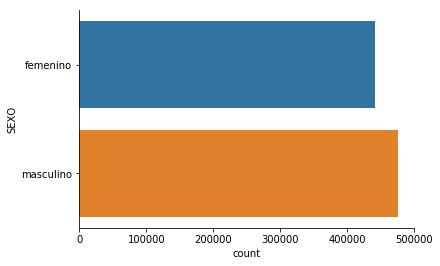

In [49]:
sns.countplot(y=df['SEXO'])
sns.despine()

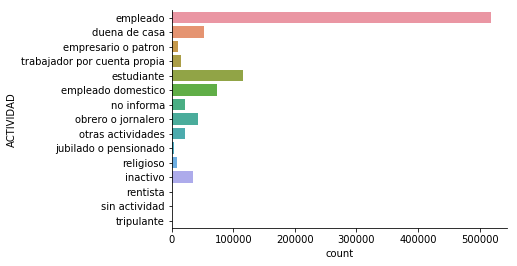

In [52]:
sns.countplot(y=df['ACTIVIDAD'])
sns.despine()

In [53]:
top_profesion = df.PROFESION.value_counts()[0:10]
top_profesion

empleado             139421
estudiante            95464
asesora del hogar     70933
menor de edad         47331
duena de casa         46299
ayudante              27136
vendedor              26851
ingeniero             25164
obrero                23442
jornalero             22146
Name: PROFESION, dtype: int64

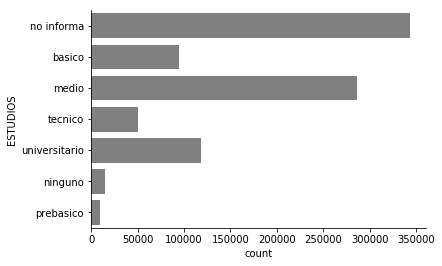

In [54]:
sns.countplot(y=df['ESTUDIOS'], color='grey')
sns.despine()

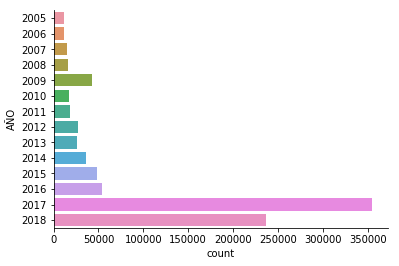

In [55]:
sns.countplot(y=df['AÑO'])
sns.despine()

In [50]:
top_paises = df.PAIS.value_counts()[0:10]
top_paises

peru                       213936
venezuela                  166718
haiti                      129914
colombia                   127008
bolivia                     98400
argentina                   32456
ecuador                     29571
china republica popular     14825
espana                      13861
brasil                      12193
Name: PAIS, dtype: int64

In [58]:
TOP_PAISES_POP = top_paises.sum()
TOT_INM = len(df.SEXO)
print("Total de Inmigrantes", TOT_INM)
print("Total de Inmigrantes dos Top10:{}, que es {}% del total".format(TOP_PAISES_POP, round((TOP_PAISES_POP/TOT_INM)*100, 0)))

Total de Inmigrantes 917131
Total de Inmigrantes dos Top10:838882, que es 91.0% del total


In [96]:
top_regiones = df.REGION.value_counts()[0:3]
top_regiones

metropolitana    589106
antofagasta       87270
valparaiso        48072
Name: REGION, dtype: int64

In [97]:
TOP_REG_POP = top_regiones.sum()
print("Total de Inmigrantes dos Top3 regiones: {}, que es {}% del total".format(TOP_REG_POP, round((TOP_REG_POP/TOT_INM)*100, 0)))

Total de Inmigrantes dos Top3 regiones: 724448, que es 79.0% del total


**Key Insight**

- 91% de los estranjeros són de 10 paises, y 
- Case 80% del total está concentrado en 3 regiones, con mas de la mitad en la Metrolpolitana 

## 3. Reconocer dificultades del dataset

### Detectar outliers
La fecha de nascimiento muy posiblemente puede tener outliers

In [101]:
df.NACIMIENTO.dt.year.describe()

count    917131.000000
mean       1984.915044
std          13.474518
min        1900.000000
25%        1977.000000
50%        1986.000000
75%        1993.000000
max        2018.000000
Name: NACIMIENTO, dtype: float64

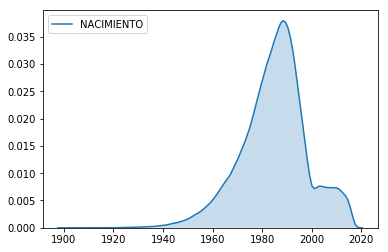

In [104]:
sns.kdeplot(df.NACIMIENTO.dt.year, shade=True)

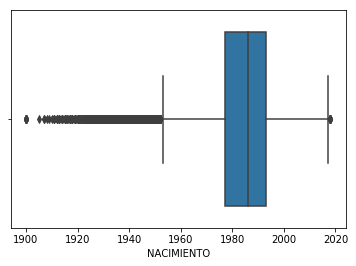

In [113]:
sns.boxplot(df.NACIMIENTO.dt.year)

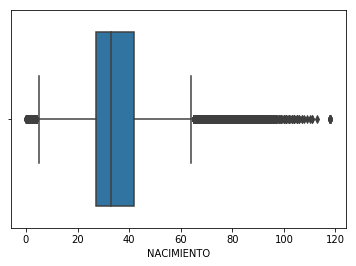

In [121]:
edad_titular = 2018 - (df[df.TIT_DEP =='t'].NACIMIENTO.dt.year)
sns.boxplot(edad_titular)

In [122]:
edad_titular.describe()

count    809661.000000
mean         35.136342
std          11.941482
min           0.000000
25%          27.000000
50%          33.000000
75%          42.000000
max         118.000000
Name: NACIMIENTO, dtype: float64

In [124]:
(edad_titular > 100).sum()

54

In [127]:
(edad_titular < 16).sum()

25047

**Key Insights**

- Muy pocas personas titulares que podrian tener mas de 100 años y ademas muchos fueron permisos consedidos a mas de 10 años. Así o se puede borrar estos datos o dejarlos. No harán mucha diferencia. 
- El problema mas grande es en relación a la edad minima de los titulares, pues hay un numero significativo de personas que són titulares pero tienen menos de 16 anõs y seguro deben de ser dependentes de otros. 

## 4. Mirar la Región Metropolitana en detajes

In [135]:
metro = df[df.REGION == 'metropolitana']
metro.shape

(589106, 12)

In [148]:
metro.sample(10)

,SEXO,NACIMIENTO,ACTIVIDAD,PROFESION,PAIS,ESTUDIOS,COMUNA,PROVINCIA,REGION,TIT_DEP,AÑO,BENEFICIO
54024,masculino,1980-09-30,obrero o jornalero,jornalero,haiti,no informa,maipu,santiago,metropolitana,t,2017,definitiva
114101,femenino,2002-11-27,estudiante,estudiante,venezuela,no informa,santiago,santiago,metropolitana,d,2017,temporaria
104704,masculino,1975-12-30,empleado,junior,venezuela,medio,maipu,santiago,metropolitana,t,2018,temporaria
77033,masculino,1989-08-16,empleado,ingeniero,venezuela,universitario,santiago,santiago,metropolitana,t,2017,definitiva
213408,femenino,1985-04-28,estudiante,estudiante,brasil,universitario,la florida,santiago,metropolitana,t,2014,definitiva
92883,masculino,1989-02-26,empleado,empleado,venezuela,medio,pudahuel,santiago,metropolitana,t,2017,temporaria
3538,masculino,1979-07-07,empleado,pintor,colombia,medio,providencia,santiago,metropolitana,t,2017,definitiva
28697,femenino,1957-06-07,empleado domestico,asesora del hogar,peru,no informa,pudahuel,santiago,metropolitana,t,2006,definitiva
12261,masculino,1985-04-03,empleado,vendedor,haiti,no informa,estacion central,santiago,metropolitana,t,2018,definitiva
98538,femenino,1983-03-31,empleado,estudiante,peru,no informa,estacion central,santiago,metropolitana,d,2008,definitiva


In [137]:
metro.PROVINCIA.unique()

array(['santiago', 'chacabuco', 'talagante', 'melipilla', 'cordillera',
       'maipo'], dtype=object)

In [143]:
metro.COMUNA.value_counts()

santiago               162325
las condes              38888
independencia           37783
estacion central        30937
recoleta                29155
providencia             21176
nunoa                   19523
quilicura               18449
quinta normal           15685
la florida              14020
maipu                   12404
san bernardo            11003
san miguel              10426
penalolen               10391
conchali                10141
lo barnechea             9442
puente alto              9088
colina                   8879
vitacura                 8296
macul                    7578
melipilla                7382
cerro navia              7270
pudahuel                 7054
lo prado                 7040
san joaquin              6319
la cisterna              6169
pedro aguirre cerda      6047
renca                    5218
cerrillos                4993
lo espejo                4751
la reina                 4601
huechuraba               4542
lampa                    4073
el bosque 